# Hands On Project

car price prediction model based on feature.

We will use the dataset from kaggle
https://www.kaggle.com/datasets/CooperUnion/cardataset

<br>
Here is the pan:
- Prepare data and do EDA
- Use linear regression
- Understand the internals of linear regression
- Evaluate with RMSE
- Feature engineering
- Regularization
- Use the model


## 1: Data Prep



In [1]:
#imports
import pandas as pd
import numpy as np

In [2]:
# To load data form a csv use pd.read_csv()


df = pd.read_csv('data/car-price.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


notice how there are some inconsistencies for the column names, some have upper case some have under scores. Lets make them lower case and mak ethem lower case

In [3]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Now we normalize the values. First we need to find the non string columns

In [5]:
# get all types
df.dtypes

# we only care about the objects

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
# care about the index, since values are all object\
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
# loop over to clean them up
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')
    
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory Data Analysis


In [227]:
for col in df.columns:
    print(col)
    print(df[col].unique()) 
    print(df[col].nunique()) # see how many unique values there actually are per column
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-class' '6000'
 '612_scaglietti'

In [228]:
#now we visualize it

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<Axes: xlabel='msrp', ylabel='Count'>

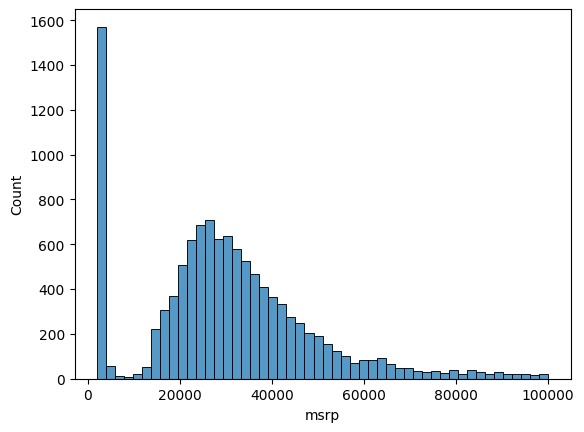

In [229]:
#lets see the price distribution
#bins is the width of each bar
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

# we can see msot cars are cheap but there are a few ars are up to the millions.
# this is the long tail distribution, by butting the requirement of < 100k we remove the long tail

<Axes: xlabel='msrp', ylabel='Count'>

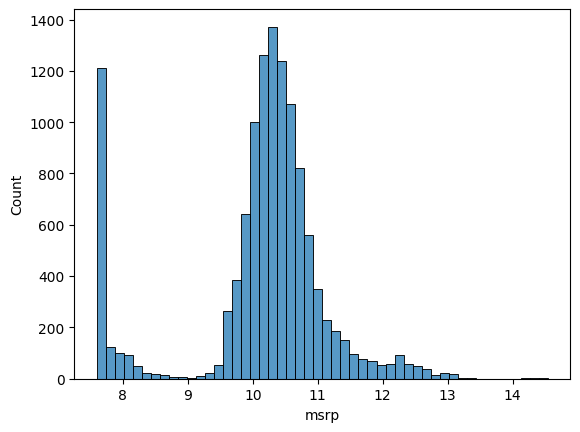

In [230]:
# lets get rid of this long tail, with the log distribution. 

np.log([1, 10, 1000, 100000]) 
# you can see it brings high values and bring it lower
# we cannot log 0
#it is common to add one to each item in the list, insetad of log it is log1p

np.log1p([1, 10, 1000, 100000]) 

#use this on the prices

price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins = 50) #notice how the tail is gone. Now this is normal dist 
#models love normal distribution

In [231]:
# gettinf rid of missing values

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# setting up validation framework to validate the model

as mentioend before, we need to take our model to use some ata fro training, some for validatoin, and some for testing.

lets do 60 20 20 split



In [238]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
#this way there are no rounding erros and we use all the data

In [239]:
# now lets decompose the df, we can use oloc


df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train+ n_val:]


In [240]:
# we need to shuffle the records so it distributes evenly
# here is how we do it

idx = np.arange(n)
np.random.seed(2) # so that it is reproducable
np.random.shuffle(idx)


df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+ n_val:]]

#now we are getting it through the index instad of directly using the iloc


# check to make sure the numbers are right
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [241]:
# now we reset the index column 


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test = df_train.reset_index(drop=True)


In [242]:
# getting the target variables (y)

df
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)


In [243]:

# remove the values from original df

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Training with linaer regression

we have learned the theory and now we actually have to train it

in linear regression we predict y using g(X) = Xw, and ideally we want Xw  = y but this is often impossible

<br>

To solve this, we use the **normal equation**:

$$
X^T X w = X^T y
$$

$X^T X$ (the Gram matrix) is square, so we can invert it.

Solving for $w$ gives:

$$
w = (X^T X)^{-1} X^T y
$$

This $w$ is the best approximation for minimizing the difference between $Xw$ and $y$.

**Implementation task:** write `train_linear_regression(X, y)` to compute and return $w$.


In [245]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

y = [10000, 20000, 15000, 20050, 10000, 20000 , 15000, 25000, 12000]

X = np.array(X)


#add the ones for the intercept

ones = np.ones(X.shape[0])

X = np.column_stack([ones, X])

In [215]:
# now we make xtx

XTX = X.T.dot(X)

XTX_inv = np.linalg.inv(XTX)

In [246]:
#now we get the w

w_full = XTX_inv.dot(X.T).dot(y)

w0 = w_full[0]
w =  w_full[1:]

In [247]:
w0, w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [250]:
#now we put it ina function

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX) 
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


In [251]:
train_linear_regression(X, y)

LinAlgError: Singular matrix

# Car price baseline model

now that we made it, lets use it on the data

In [252]:
df_train.dtypes

#we will only use the number colums as the features

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [253]:
base = ['engine_hp','engine_cylinders', 'highway_mpg', 'city_mpg',  'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [260]:
#now we extract the numbers into our matrix

X_train = df_train[base].fillna(0).values


df_train[base].fillna(0).isnull().sum()


engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [261]:
w0, w = train_linear_regression(X_train, y_train)

# now we can make predictions with these wights

w0


np.float64(7.927257388069986)

In [263]:
y_pred = w0 + X_train.dot(w)

y_pred


array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

<Axes: ylabel='Count'>

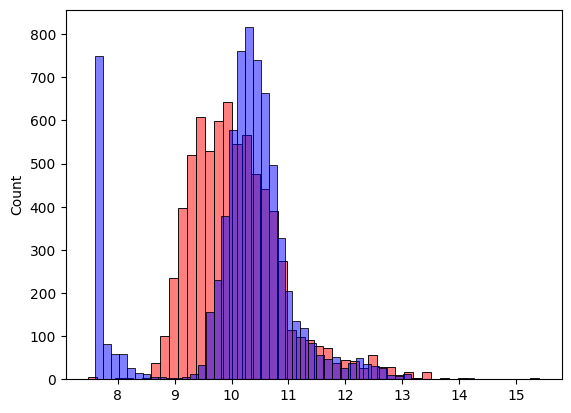

In [264]:

sns.histplot(y_pred, color='red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color='blue', alpha = 0.5, bins = 50)

# RMSE 

Smaller is better

Root mean square error, a good way to see the performance of your models

this is the average of the difference bewteen each prediction and the actual value squared, so we sum (g(Xi) and yi)^2 and divide by the number


The Root Mean Squared Error (RMSE) is:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

**Where:**  

\[
\begin{aligned}
n & : \text{number of observations} \\
y_i & : \text{actual value for observation } i \\
\hat{y}_i & : \text{predicted value for observation } i
\end{aligned}
\]


In [265]:
#python implementation

def rmse(y, y_pred):
    error = y-y_pred
    se = error ** 2 # squared error
    mse = se.mean() # mean error
    return np.sqrt(mse)

In [266]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

# validating the model
we used RMSE on the training dta, but we should actually use it on the validation data set

In [267]:
base = ['engine_hp','engine_cylinders', 'highway_mpg', 'city_mpg',  'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [270]:
# we copied the above code so we can extract the prepare algo to make a function so it is easier. Then we can use that on the validation data


def prepare_X(df):
    X = df[base].fillna(0).values
    return X

In [271]:
#train the model again and test it with validation data

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)


X_val = prepare_X(df_val)

#now we apply the weights (model)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.761653099130156)

# Feature engineering


In [ ]:
#there is a year column that we should also use, abd to use this we can compute the age of the car and add that as a feature

#df_train.year.max() returns 2017

#so we do this to modify the prepare function. note that we defer it so we dont change the actual df

def prepare_X(df):
    
    df = df.copy()
    df['age'] = 2017-df.year
    features = base + ['age']
    X = df[features].fillna(0).values
    return X

In [ ]:
X_train = prepare_X(df_train)

#now after prep we can do the whole thing again

w0, w = train_linear_regression(X_train, y_train)


X_val = prepare_X(df_val)

#now we apply the weights (model)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

#we see that the number is smaller so the model improved

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

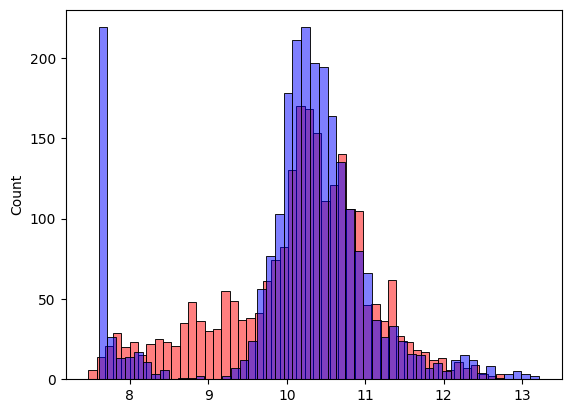

In [279]:
sns.histplot(y_pred, color='red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color='blue', alpha = 0.5, bins = 50)

# Categorical Variables

these are variables that are categories, type object. This based on the situation becuase in ou ase the number of doors is still categorical, not numerical.

Typically we encode it by making it a bunch of binary. here is an example:

we have 2, 3, 4 door numbers, so what we do is we make 3 columns
- each door count is a column
- and 2 door cars has 1 in the 2 door column and 0 for the other columns, same for everything else

In [281]:
# lets implement this here


for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [303]:
#lets modify our prepare x function yet again to get this 

def prepare_X(df):
    
    df = df.copy()
    df['age'] = 2017-df.year
    features = base.copy()
    features.append('age') 
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    
    X = df[features].fillna(0).values
    return X

In [304]:
#now lets train again and compare the results

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)



np.float64(0.515799564150169)

In [307]:
#lets now also add the top 5 car makes to make it better, more accurate

# same principle as before

makes = list(df.make.value_counts().head().index)


def prepare_X(df):
    
    df = df.copy()
    df['age'] = 2017-df.year
    features = base.copy()
    features.append('age') 
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
    for v in makes:
        df['makes%s' % v] = (df.make == v).astype('int')
        features.append('makes%s' % v)
    
    
    X = df[features].fillna(0).values
    return X

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

# we can see that the number got even smaller, which is nice

np.float64(0.5076038849556795)

In [310]:
# now lets do this for other categories, like make, fiel type, transmission type, etc.
cat = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'
    
]

categories = {}

for c in cat:
    categories[c] = list(df[c].value_counts().head().index)

categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [315]:
#modify the prepare again


def prepare_X(df):
    
    df = df.copy()
    df['age'] = 2017-df.year
    features = base.copy()
    features.append('age') 
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
        
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c, v))
    
    
    X = df[features].fillna(0).values
    return X



In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)



#the number is huge, somethign must have went wrong

np.float64(23.019020704791835)

# Regularization

so in our last time the weights are extremely high, why?

If the feature matrix has duplicate columns (or columns that can be expressed as a linear combination of other columns), it will not have an inverse matrix. But, sometimes this error could be passed if certain values are slightly different between duplicated columns.

So, if we apply the normal equation with this feature matrix, the values associated with duplicated columns are very large, which decreases the model performance. To solve this issue, one alternative is adding a small number to the diagonal of the feature matrix, which corresponds to regularization.

This technique works because the addition of small values to the diagonal makes it less likely to have duplicated columns. The regularization value is a hyperparameter of the model. After applying regularization the model performance improved.

In [319]:

#lets do this on a small example:

XTX = [
    [1,2,2], 
    [2,1,1.00000001],
    [2,1.0000001,1]
]

np.linalg.inv(XTX)

array([[-3.33333337e-01,  6.06060607e-01,  6.06060605e-02],
       [ 6.06060598e-02, -9.09090913e+06,  9.09090910e+06],
       [ 6.06060609e-01,  9.09090882e+06, -9.09090913e+06]])

In [ ]:
# if we add it to the diagnoal, it is less likely that one colis a duplicate of another, therefore we cansee that the weightws are a log more under control

XTX = [
    [1.001,2,2], 
    [2,1.01,1.0000001],
    [2,1.000001,1.01]
]

np.linalg.inv(XTX)

array([[ -0.33567203,   0.33398689,   0.33401696],
       [  0.33401696,  49.91916617, -50.08634166],
       [  0.33398689, -50.08632661,  49.91916617]])

In [ ]:
# to implement this. we need to use the identity matrix

XTX = [
    [1,2,2], 
    [2,1,1.00000001],
    [2,1.0000001,1]
]

XTX + (0.01 * np.eye(3))

array([[1.01      , 2.        , 2.        ],
       [2.        , 1.01      , 1.00000001],
       [2.        , 1.0000001 , 1.01      ]])

In [323]:
def train_linear_regression_regu(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX) 
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)


#we can see the number is a lot better than the non regularized, it is also better than what we had before

np.float64(0.45651750867781377)

# Finding the best regularization parameter to tune the model


In [328]:
for r in [0.0,0.00001, 0.000001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_regu(X_train, y_train, r = r)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    print(r, w0, rmse(y_val, y_pred))


#we can how even with a bit of regularization it improves, but then it kinda gets worse again as the regularization number goes up

0.0 4011091003551887.0 23.019020704791835
1e-05 6.178192055025445 0.45651702823445617
1e-06 187.8839690767719 0.4565172637906094
0.001 6.285636717989048 0.45651750867781377
0.1 6.1912087238544915 0.4565692763007501
1 5.634896668066369 0.45722043179930605
10 4.283980108968471 0.4701456932099909


# Using the model

In [332]:
#train the final model using the entire data (train and validation) and then run it on the test dataset

df_full_train = pd.concat([df_train, df_val])

df_full_train.reset_index(drop = True)

X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])


w0, w = train_linear_regression_regu(X_full_train, y_full_train, r = 0.01)


In [ ]:
#now lets use the test dataset

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
print(r, w0, rmse(y_test, y_pred))

# good score, we did well

10 6.314017129548202 0.46055823540819013


In [338]:
# now lets test it by making a feature vector 
# we will get a random one from the test dataset and pretend it is a new object to test this data on
car = df_test.iloc[20].to_dict()

In [339]:
#we pretend we got a json and need to convert it to a df

df_small = pd.DataFrame([car])

X_small = prepare_X(df_small)

In [ ]:
#then we run the model

y_pred = w0 + X_small.dot(w)
np.expm1(y_pred) # we did log so we have to un log it

array([37020.33267897])